In [ ]:
!pip install opendatasets
!pip install pandas
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=617fa055644ae37f8999d4f84270f2284803fb13eab1257be91c43047afecb80
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import opendatasets as od
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Ignore all warnings
warnings.filterwarnings("ignore")



In [ ]:
od.download("https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification/code")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: marthadimgba
Your Kaggle Key: ··········


100%|██████████| 45.8k/45.8k [00:00<00:00, 36.8MB/s]

In [ ]:
%%time
data=pd.read_csv("/content/fetal-health-classification/fetal_health.csv")
data=data.dropna()
data.head(10)

CPU times: user 15 ms, sys: 7.92 ms, total: 23 ms
Wall time: 37.7 ms


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [ ]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
data.duplicated().sum()

13

In [ ]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [ ]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
data.shape

(2126, 22)

In [ ]:
data['fetal_health'].unique()

array([2., 1., 3.])

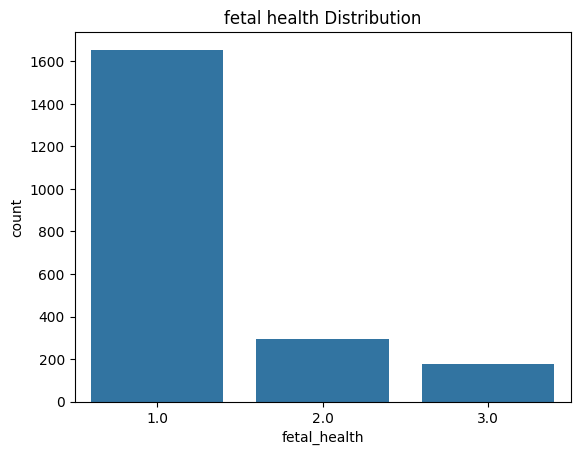

In [ ]:
sns.countplot(x=data['fetal_health'])
plt.title('fetal health Distribution');

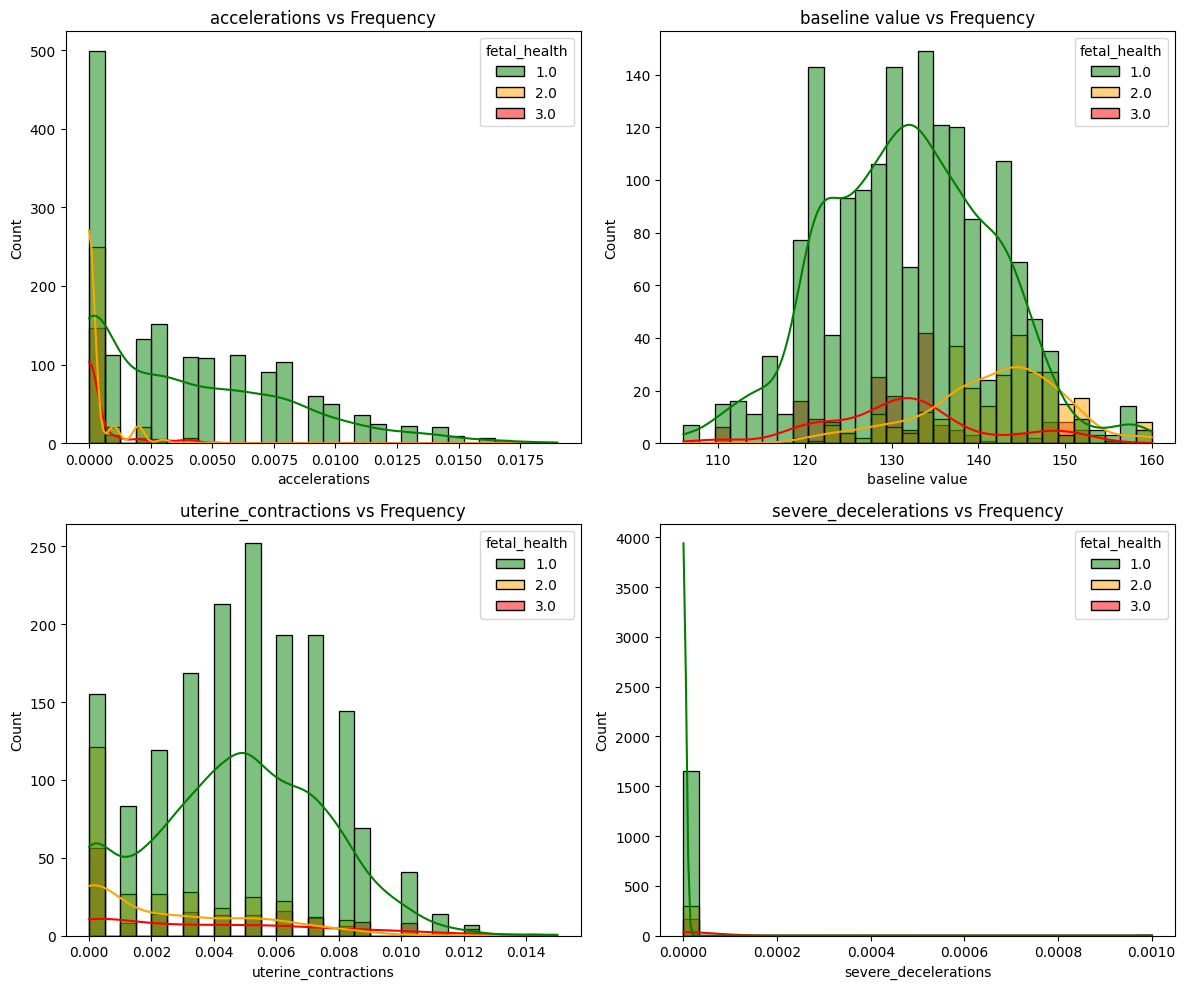

In [ ]:
cols = ['accelerations', 'baseline value', 'uterine_contractions', 'severe_decelerations']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

palette = {1.0: 'green', 2.0: 'orange', 3.0: 'red'} #numerical values for the label
# Flatten the 2D array of axes for easy iteration
axes_flat = axes.flatten()
for i, cols in enumerate(cols):
    sns.histplot(data=data, x=cols, bins=30, ax=axes_flat[i], hue='fetal_health', kde=True, palette=palette)
    axes_flat[i].set_title(f'{cols} vs Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

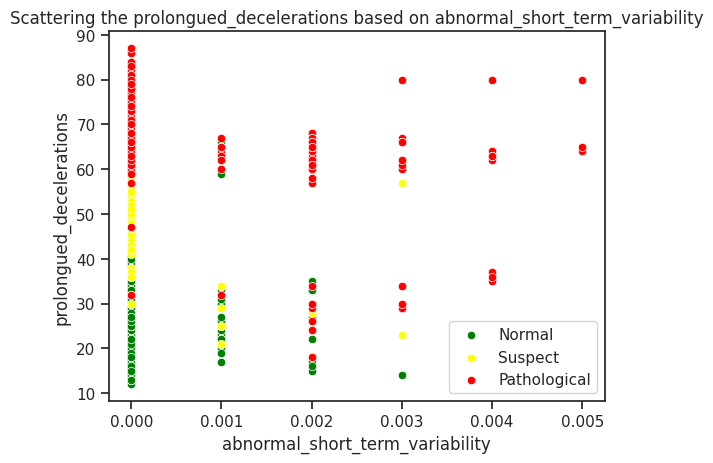

In [ ]:
sns.set_theme(style="ticks")
sns.scatterplot(x=data.prolongued_decelerations[data.fetal_health==1.0], y=data.abnormal_short_term_variability[(data.fetal_health==1.0)], c="Green" )
sns.scatterplot(x=data.prolongued_decelerations[data.fetal_health==2.0], y=data.abnormal_short_term_variability[(data.fetal_health==2.0)], c="Yellow" )
sns.scatterplot(x=data.prolongued_decelerations[data.fetal_health==3.0], y=data.abnormal_short_term_variability[(data.fetal_health==3.0)], c="Red" )

plt.title('Scattering the prolongued_decelerations based on abnormal_short_term_variability')
plt.legend(["Normal", "Suspect", "Pathological"])
plt.xlabel("abnormal_short_term_variability")
plt.ylabel("prolongued_decelerations");
plt.grid(visible=False)

In [ ]:
cross_tab = pd.crosstab(data['fetal_movement'], data['fetal_health'])
print("Cross-tabulation of fetal_movement vs. fetal_health:")
print(cross_tab)


Cross-tabulation of fetal_movement vs. fetal_health:
fetal_health     1.0  2.0  3.0
fetal_movement                
0.000           1071  158   82
0.001            125   11   28
0.002             73   15   24
0.003             62   16   10
0.004             35   13    1
...              ...  ...  ...
0.455              1    0    0
0.469              1    0    0
0.470              1    0    0
0.477              1    0    0
0.481              1    0    0

[102 rows x 3 columns]


In [ ]:
X = data.iloc[:, 0: -1].values
Y = data.iloc[:, -1].values

In [ ]:
#DataCleaning

Y=Y.reshape(-1,1)
imputerX = SimpleImputer(strategy = "mean", missing_values = np.nan)
imputerX = imputerX.fit(X)
X = imputerX.transform(X)
imputerY = SimpleImputer(strategy = "mean", missing_values = np.nan)
imputerY = imputerY.fit(Y)
Y = imputerY.transform(Y)
Y = np.ravel(Y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.9373040752351097


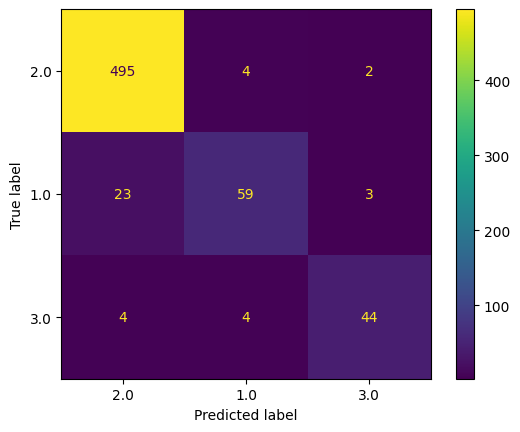

In [ ]:
cm = confusion_matrix(y_test, pred)
classes = data.fetal_health.unique()
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()

plt.show()

In [ ]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       501
         2.0       0.88      0.69      0.78        85
         3.0       0.90      0.85      0.87        52

    accuracy                           0.94       638
   macro avg       0.91      0.84      0.87       638
weighted avg       0.94      0.94      0.93       638



Hyperparameter Tuning

In [ ]:
#grid search
rfc_params={

    "n_estimators":[100, 300, 600, 1000, 2000],
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":[1, 2, 3, 4],
    'bootstrap': [True, False],
    'criterion' :['gini', 'entropy']
}


In [ ]:
%%time
rfc_gridSearch=GridSearchCV(rfc, rfc_params, scoring='accuracy', cv=10, n_jobs=-1,verbose=0)
rfc_gridSearch.fit(X_train,y_train)

CPU times: user 50.5 s, sys: 11.1 s, total: 1min 1s
Wall time: 1h 25min 26s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 300, 600, 1000, 2000]},
             scoring='accuracy')

In [ ]:
rfc_gridSearch.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [ ]:
rfc_gridSearch.best_score_

0.946272446943588

In [ ]:
rfc_best = RandomForestClassifier(**rfc_gridSearch.best_params_)
rfc_best.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=4, n_estimators=300)

In [ ]:
y_pred=rfc_best.predict(X_test)
accuracy_score(y_pred,y_test)

0.957680250783699

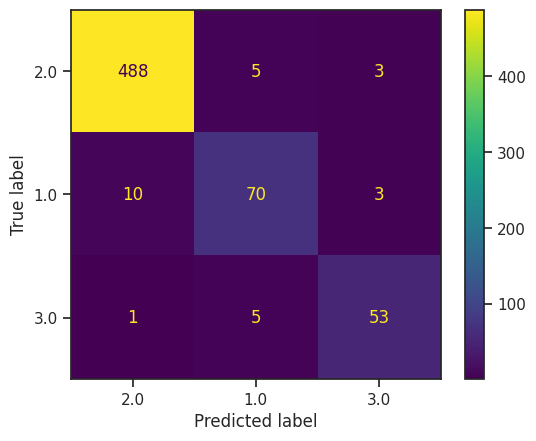

In [ ]:
cm = confusion_matrix(y_test, y_pred)
classes = data.fetal_health.unique()
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()

plt.show()

In [ ]:
#Random Search

from sklearn.model_selection import RandomizedSearchCV

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=rfc_params,
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy',  # Choose an appropriate metric
    cv=10,  # Number of cross-validation folds
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train,y_train)
# Print the best hyperparameters and corresponding score
print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': False}
Best cross-validation score: 0.9429076727734447


In [ ]:
best_rfc_model = RandomForestClassifier(**random_search.best_params_)
best_rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=3)

In [ ]:
y_pred=best_rfc_model.predict(X_test)
print('accuracy:',accuracy_score(y_test, y_pred))

accuracy: 0.9545454545454546


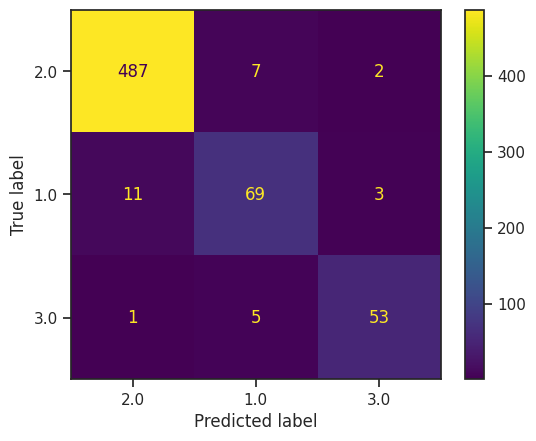

In [ ]:
cm = confusion_matrix(y_test, y_pred)
classes = data.fetal_health.unique()
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()

plt.show()

In [ ]:
 f#Genetic poppulatiopn generation comparison
!pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=2ff89d0f9e4b652df0b53665166b392e65e49177e9eea7690f49a9e83f14532b
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
from tpot import TPOTClassifier

In [ ]:
# Define the TPOT configuration for regression
tpot_config = {
    'sklearn.ensemble.RandomForestClassifier': {
        "n_estimators":[100, 300, 600, 1000, 2000],
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":[1, 2, 3],
    'bootstrap': [True, False],
    'criterion' :['gini', 'entropy']
    }
}

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=10, population_size=10, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test Acc: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7e3b504b9870>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7e3b504b9870>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        min_samples_split=4))])
Test MSE: 0.9451


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=10, population_size=30, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/80 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9475603119898424

Generation 2 - Current best internal CV score: 0.9475603119898424

Generation 3 - Current best internal CV score: 0.9475603119898424

Generation 4 - Current best internal CV score: 0.9475603119898424

Generation 5 - Current best internal CV score: 0.9475603119898424

Generation 6 - Current best internal CV score: 0.9475603119898424

Generation 7 - Current best internal CV score: 0.9475603119898424

Generation 8 - Current best internal CV score: 0.9475603119898424

Generation 9 - Current best internal CV score: 0.9475603119898424

Generation 10 - Current best internal CV score: 0.9475603119898424

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=entropy, min_samples_leaf=3, min_samples_split=4, n_estimators=100)
Best score (accuracy): 0.9436


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test Acc: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7e3b504b9870>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7e3b504b9870>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        min_samples_leaf=3,
                                        min_samples_split=4))])
Test Acc: 0.9436


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=10, population_size=50, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9475693814619989

Generation 2 - Current best internal CV score: 0.9475693814619989

Generation 3 - Current best internal CV score: 0.9475693814619989

Generation 4 - Current best internal CV score: 0.9475693814619989

Generation 5 - Current best internal CV score: 0.9475693814619989

Generation 6 - Current best internal CV score: 0.9475693814619989

Generation 7 - Current best internal CV score: 0.9475693814619989

Generation 8 - Current best internal CV score: 0.9475693814619989

Generation 9 - Current best internal CV score: 0.9475693814619989

Generation 10 - Current best internal CV score: 0.9475693814619989

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=entropy, min_samples_leaf=2, min_samples_split=3, n_estimators=2000)
Best score (accuracy): 0.9467


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7e3b504b9870>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7e3b504b9870>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        min_samples_leaf=2, min_samples_split=3,
                                        n_estimators=2000))])
Test MSE: 0.9467


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=10, population_size=70, cv=10, offspring_size = 5, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9462543079992745

Generation 2 - Current best internal CV score: 0.9462543079992745

Generation 3 - Current best internal CV score: 0.9469299836749503

Generation 4 - Current best internal CV score: 0.9469299836749503

Generation 5 - Current best internal CV score: 0.9469299836749503

Generation 6 - Current best internal CV score: 0.9469299836749503

Generation 7 - Current best internal CV score: 0.9469299836749503

Generation 8 - Current best internal CV score: 0.9469299836749503

Generation 9 - Current best internal CV score: 0.9469299836749503

Generation 10 - Current best internal CV score: 0.9469299836749503

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=entropy, min_samples_leaf=1, min_samples_split=4, n_estimators=300)
Best score (accuracy): 0.9545


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        min_samples_split=4,
                                        n_estimators=300))])
Test MSE: 0.9545


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=10, population_size=100, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9469254489388719

Generation 2 - Current best internal CV score: 0.9469254489388719

Generation 3 - Current best internal CV score: 0.9469254489388719

Generation 4 - Current best internal CV score: 0.9469254489388719

Generation 5 - Current best internal CV score: 0.9469254489388719

Generation 6 - Current best internal CV score: 0.9469254489388719

Generation 7 - Current best internal CV score: 0.9469254489388719

Generation 8 - Current best internal CV score: 0.9469254489388719

Generation 9 - Current best internal CV score: 0.9469254489388719

Generation 10 - Current best internal CV score: 0.9469254489388719

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=gini, min_samples_leaf=2, min_samples_split=2, n_estimators=600)
Best score (accuracy): 0.9483


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        n_estimators=600))])
Test MSE: 0.9483


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=10, population_size=150, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.946916379466715

Generation 2 - Current best internal CV score: 0.946916379466715

Generation 3 - Current best internal CV score: 0.946916379466715

Generation 4 - Current best internal CV score: 0.946916379466715

Generation 5 - Current best internal CV score: 0.946916379466715

Generation 6 - Current best internal CV score: 0.946916379466715

Generation 7 - Current best internal CV score: 0.946916379466715

Generation 8 - Current best internal CV score: 0.946916379466715

Generation 9 - Current best internal CV score: 0.946916379466715

Generation 10 - Current best internal CV score: 0.946916379466715

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=gini, min_samples_leaf=1, min_samples_split=3, n_estimators=100)
Best score (accuracy): 0.9514


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, min_samples_split=3))])
Test MSE: 0.9514


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=10, population_size=200, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9475965898784692

Generation 2 - Current best internal CV score: 0.9475965898784692

Generation 3 - Current best internal CV score: 0.9475965898784692

Generation 4 - Current best internal CV score: 0.9475965898784692

Generation 5 - Current best internal CV score: 0.9475965898784692

Generation 6 - Current best internal CV score: 0.9475965898784692

Generation 7 - Current best internal CV score: 0.9475965898784692

Generation 8 - Current best internal CV score: 0.9475965898784692

Generation 9 - Current best internal CV score: 0.9475965898784692

Generation 10 - Current best internal CV score: 0.9475965898784692

Best pipeline: RandomForestClassifier(CombineDFs(input_matrix, input_matrix), bootstrap=False, criterion=gini, min_samples_leaf=2, min_samples_split=3, n_estimators=100)
Best score (accuracy): 0.9498


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        min_samples_split=3))])
Test MSE: 0.9498


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=20, population_size=10, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9475920551423908

Generation 2 - Current best internal CV score: 0.9475920551423908

Generation 3 - Current best internal CV score: 0.9475920551423908

Generation 4 - Current best internal CV score: 0.9475920551423908

Generation 5 - Current best internal CV score: 0.9475920551423908

Generation 6 - Current best internal CV score: 0.9475920551423908

Generation 7 - Current best internal CV score: 0.9475920551423908

Generation 8 - Current best internal CV score: 0.9475920551423908

Generation 9 - Current best internal CV score: 0.9475920551423908

Generation 10 - Current best internal CV score: 0.9475920551423908

Generation 11 - Current best internal CV score: 0.9482631960819881

Generation 12 - Current best internal CV score: 0.9482631960819881

Generation 13 - Current best internal CV score: 0.9482631960819881

Generation 14 - Current best internal CV score: 0.9482631960819881

Generation 15 - Current best internal CV score: 0.948263

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, min_samples_split=3,
                                        n_estimators=1000))])
Test MSE: 0.9498


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=20, population_size=30, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/130 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9442272809722475

Generation 2 - Current best internal CV score: 0.9442272809722475

Generation 3 - Current best internal CV score: 0.9442272809722475

Generation 4 - Current best internal CV score: 0.9455786323235988

Generation 5 - Current best internal CV score: 0.946916379466715

Generation 6 - Current best internal CV score: 0.946916379466715

Generation 7 - Current best internal CV score: 0.946916379466715

Generation 8 - Current best internal CV score: 0.946916379466715

Generation 9 - Current best internal CV score: 0.946916379466715

Generation 10 - Current best internal CV score: 0.946916379466715

Generation 11 - Current best internal CV score: 0.946916379466715

Generation 12 - Current best internal CV score: 0.946916379466715

Generation 13 - Current best internal CV score: 0.946916379466715

Generation 14 - Current best internal CV score: 0.946916379466715

Generation 15 - Current best internal CV score: 0.946916379466715


In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, min_samples_split=3,
                                        n_estimators=2000))])
Test MSE: 0.9514


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=20, population_size=50, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9462543079992745

Generation 2 - Current best internal CV score: 0.9462543079992745

Generation 3 - Current best internal CV score: 0.9462543079992745

Generation 4 - Current best internal CV score: 0.9462543079992745

Generation 5 - Current best internal CV score: 0.9462543079992745

Generation 6 - Current best internal CV score: 0.9462543079992745

Generation 7 - Current best internal CV score: 0.9462543079992745

Generation 8 - Current best internal CV score: 0.9462543079992745

Generation 9 - Current best internal CV score: 0.9462543079992745

Generation 10 - Current best internal CV score: 0.9462543079992745

Generation 11 - Current best internal CV score: 0.9462543079992745

Generation 12 - Current best internal CV score: 0.9469209142027936

Generation 13 - Current best internal CV score: 0.9469209142027936

Generation 14 - Current best internal CV score: 0.9469209142027936

Generation 15 - Current best internal CV score: 0.946920

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>)),
                                                ('functiontransformer-2',
                                                 FunctionTransformer(func=<function copy at 0x7fae3d95da20>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        min_samples_split=4,
                                        n_estimators=600))])
Test MSE: 0.9561


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=20, population_size=70, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/170 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9550018138944314

Generation 2 - Current best internal CV score: 0.9550018138944314

Generation 3 - Current best internal CV score: 0.9550018138944314

Generation 4 - Current best internal CV score: 0.9550018138944314

Generation 5 - Current best internal CV score: 0.9550018138944314

Generation 6 - Current best internal CV score: 0.9550018138944314

Generation 7 - Current best internal CV score: 0.9550018138944314

Generation 8 - Current best internal CV score: 0.9550018138944314

Generation 9 - Current best internal CV score: 0.9550018138944314

Generation 10 - Current best internal CV score: 0.9550018138944314

Generation 11 - Current best internal CV score: 0.9550018138944314

Generation 12 - Current best internal CV score: 0.9550018138944314

Generation 13 - Current best internal CV score: 0.9550018138944314

Generation 14 - Current best internal CV score: 0.9550018138944314

Generation 15 - Current best internal CV score: 0.955001

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestClassifier(bootstrap=False,
                                                                    criterion='entropy',
                                                                    min_samples_leaf=3,
                                                                    n_estimators=2000))),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy'))])
Test MSE: 0.9404


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=20, population_size=100, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.956344095773626

Generation 2 - Current best internal CV score: 0.956344095773626

Generation 3 - Current best internal CV score: 0.956344095773626

Generation 4 - Current best internal CV score: 0.956344095773626

Generation 5 - Current best internal CV score: 0.956344095773626

Generation 6 - Current best internal CV score: 0.956344095773626

Generation 7 - Current best internal CV score: 0.956344095773626

Generation 8 - Current best internal CV score: 0.956344095773626

Generation 9 - Current best internal CV score: 0.956344095773626

Generation 10 - Current best internal CV score: 0.956344095773626

Generation 11 - Current best internal CV score: 0.956344095773626

Generation 12 - Current best internal CV score: 0.956344095773626

Generation 13 - Current best internal CV score: 0.956344095773626

Generation 14 - Current best internal CV score: 0.956344095773626

Generation 15 - Current best internal CV score: 0.956344095773626

Gen

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestClassifier(criterion='entropy',
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=3,
                                                                    n_estimators=1000))),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=3,
                                        n_estimators=1000))])
Test MSE: 0.9342


In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=20, population_size=150, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=20, population_size=200, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=30, population_size=10, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=30, population_size=30, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=30, population_size=50, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=30, population_size=70, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9482586613459099

Generation 2 - Current best internal CV score: 0.9482586613459099

Generation 3 - Current best internal CV score: 0.9482586613459099

Generation 4 - Current best internal CV score: 0.9482586613459099

Generation 5 - Current best internal CV score: 0.9482586613459099

Generation 6 - Current best internal CV score: 0.9482586613459099

Generation 7 - Current best internal CV score: 0.9482586613459099

Generation 8 - Current best internal CV score: 0.9482586613459099

Generation 9 - Current best internal CV score: 0.9482586613459099

Generation 10 - Current best internal CV score: 0.9482586613459099

Generation 11 - Current best internal CV score: 0.9482586613459099

Generation 12 - Current best internal CV score: 0.9482586613459099

Generation 13 - Current best internal CV score: 0.9482586613459099

Generation 14 - Current best internal CV score: 0.9482586613459099

Generation 15 - Current best internal CV score: 0.948258

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

Best pipeline: Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('featureunion',
                                                 FeatureUnion(transformer_list=[('functiontransformer-1',
                                                                                 FunctionTransformer(func=<function copy at 0x7b4f92821a20>)),
                                                                                ('functiontransformer-2',
                                                                                 FunctionTransformer(func=<function copy at 0x7b4f92821a20>))])),
                                                ('functiontransformer',
                                                 FunctionTransformer(func=<function copy at 0x7b4f92821a20>))])),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        min_samples_split=3,
                  

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=30, population_size=100, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

Optimization Progress:   0%|          | 0/250 [00:00<?, ?pipeline/s]

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=30, population_size=150, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")

In [ ]:
# Initialize TPOT for classification
tpot = TPOTClassifier(generations=30, population_size=200, offspring_size = 5, cv=10, scoring='accuracy', config_dict=tpot_config, verbosity=2, n_jobs=-1)
# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Get the best pipeline (including hyperparameters)
best_pipeline = tpot.fitted_pipeline_

# Get the best score (accuracy)
best_score = tpot.score(X_test, y_test)

print(f"Best score (accuracy): {best_score:.4f}")

In [ ]:
# Evaluate the best pipeline on the test set using MSE
y_pred = best_pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Best pipeline: {best_pipeline}")
print(f"Test MSE: {acc:.4f}")